In [1]:
%pylab inline
from numpy.lib.recfunctions import *
from numpy.fft import *
from scipy.signal import *

Populating the interactive namespace from numpy and matplotlib


5.0


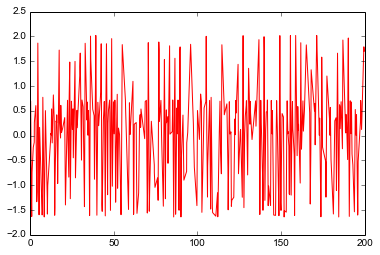

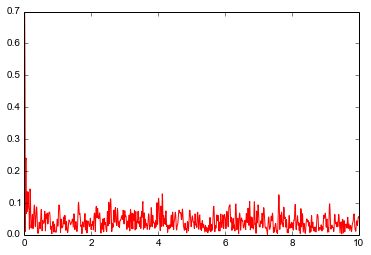

10.0


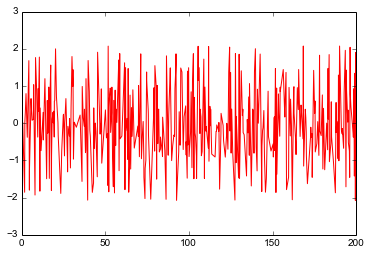

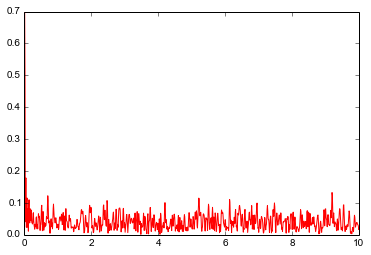

15.0


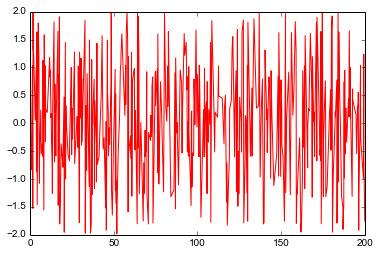

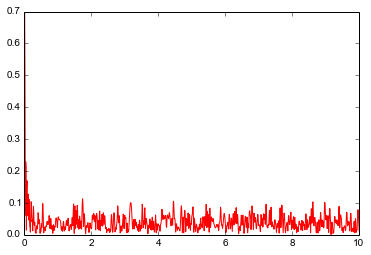

In [29]:

    
def mocksignal(t, b0, b1, Omega1, Omega2):
    return b0 + b1 * np.sin(Omega1 * t) * np.sin(Omega2 * t)

def mocknoise(sigma, N):
    return np.random.normal(0, sigma, N)

def norm(x):
    return (x - mean(x)) / std(x)

def observe(t, window_len):
    return where(floor((t / window_len) % 2) == 0)[0]

b0 = 0.5
b1 = 0.1
Omega1 = 1.0
N = 500

for Omega2 in [1.1, 1.2, 0.3]:
    print Omega2
    t = 200 * np.random.random(N)
    t.sort()
    sig = mocksignal(t, b0, b1, Omega1, Omega2) # np.sin(Omega2 * t) #

    plt.plot(t, norm(sig), '-', color='r')
    plt.show()

    f = np.linspace(0.01, 10, 1000)
    pgram = lombscargle(t, sig, f)
    normval = len(t)

    plt.plot(f, np.sqrt(4*(pgram/normval)), '-', color='r')
    plt.show()



In [24]:
data = load("pairs_with_truths.npz")['arr_0']
data = append_fields(data, 'full_pair_id', [], dtypes='<f8')
data['full_pair_id'] = data['pair'] + data['rung'] * 10000 + data['tdc'] * 100000
pair_ids = unique(data['full_pair_id'])

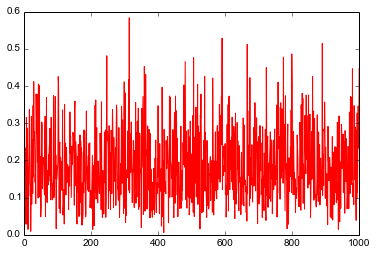

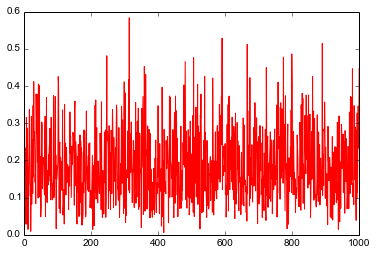

In [61]:
pair_id = pair_ids[0]

pd = data[data['full_pair_id'] == pair_id]

f = np.linspace(0.001, 1000, 1000)
normval = len(t)
t = zeros(len(pd), dtype='f8')
va = zeros(len(pd), dtype='f8')
vb = zeros(len(pd), dtype='f8')
t[:] = pd['time']
va[:]= pd['lcA']
vb[:]= pd['lcA']
pgrama = lombscargle(t, va - mean(va), f)
pgramb = lombscargle(t, vb - mean(vb), f)

plt.plot(f, np.sqrt(4*(pgrama/normval)), '-', color='r')
plt.show()
plt.plot(f, np.sqrt(4*(pgramb/normval)), '-', color='r')
plt.show()


In [37]:
min(t), max(t)

(1.8700000047683716, 1699.3800048828125)

In [47]:
d = data[argsort(data, order=['full_pair_id', 'time'])]

In [49]:
dt = d['time'][1:] - d['time'][:-1]

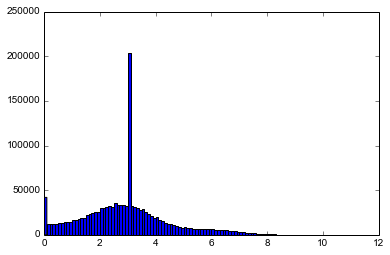

In [54]:
hist(dt, bins=1000, range=(0, 100))
show()

In [55]:
median(dt)

3.0

In [57]:
deven = d[1:][dt == 3.0]

In [60]:
len(deven) / float(len(d))

0.1204814815073619

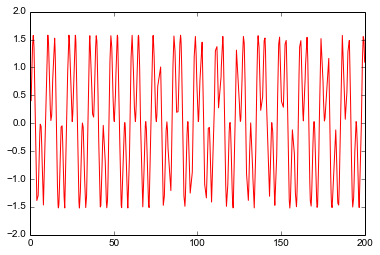

O [   25.            32.44407774    32.45166183    32.45924592    32.46683002
    32.47441411    32.4819982     32.48958229    32.49716638    32.50475048
    32.6640164     32.67160049    32.67918459    32.68676868    32.69435277
    32.70193686    32.70952095    32.71710504    32.72468914    32.73227323
    32.73985732    32.74744141    32.7550255     32.76260959    32.77019369
    32.77777778    32.78536187    32.79294596    32.80053005    32.80811414
    32.81569824    32.82328233    32.83086642    32.83845051    32.8460346
    32.8536187     32.86120279    32.86878688    32.87637097    32.88395506
    32.89153915    32.89912325    32.90670734    32.91429143    32.92187552
    32.92945961    32.9370437     32.9446278     32.95221189    33.55893923
    80.78678238    80.78854182    80.79030125    80.79206069    80.79382012
    80.79557956    80.79733899    80.79909843    80.80085786    80.837806
    80.83956544    80.84132487    80.84308431    80.84484374    80.84660318
    80.848362

In [66]:
from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

b0 = 0.5
b1 = 0.1
Omega1 = 1.0
Omega2 = 0.5
N = 500

t = 200 * np.random.random(N)
t.sort()
sig = mocksignal(t, b0, b1, Omega1, Omega2)

plt.plot(t, norm(sig), '-', color='r')
plt.show()

omega, power = search_frequencies(t, sig, zeros(len(t)), n_eval=10000, n_retry=5, LS_kwargs=dict(generalized=True))
print "O", omega
print "P", power